# World Happiness Report

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing  import power_transform
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [6]:
happiness=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
type(happiness)

pandas.core.frame.DataFrame

In [8]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Checking Columns

In [9]:
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

# Checking all Null Values

In [10]:
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Checking Data Type

In [12]:
happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [13]:
happiness['Happiness Score'].unique

<bound method Series.unique of 0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64>

# Converting into Float Data Type

In [14]:
happiness['Happiness Rank']=happiness['Happiness Rank'].astype(float)

In [15]:
happiness.dtypes

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Making DataFrame of Nominal Data

In [16]:
happiness_nominal=happiness[['Country', 'Region']].copy()
happiness_nominal.columns

Index(['Country', 'Region'], dtype='object')

# Making DataFrame of Continuous Data

In [17]:
happiness_continuous=happiness[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].copy()
happiness_continuous.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Data Visualization

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

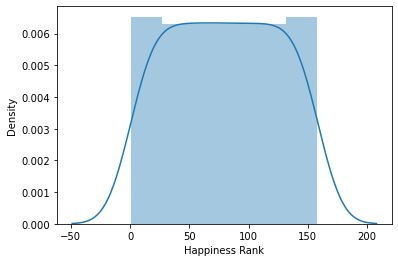

In [19]:
sns.distplot(happiness_continuous['Happiness Rank'],kde=True)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

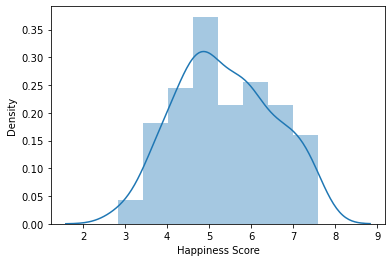

In [20]:
sns.distplot(happiness_continuous['Happiness Score'],kde=True)

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

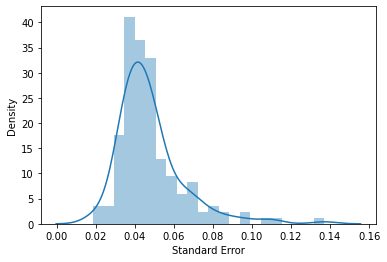

In [21]:
sns.distplot(happiness_continuous['Standard Error'],kde=True)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

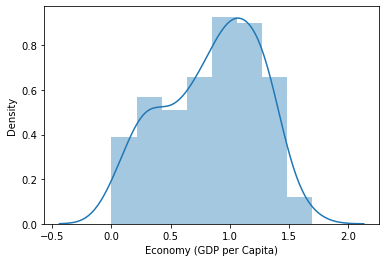

In [22]:
sns.distplot(happiness_continuous['Economy (GDP per Capita)'],kde=True)

<AxesSubplot:xlabel='Family', ylabel='Density'>

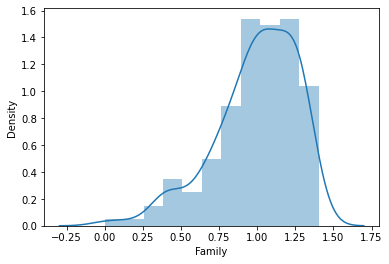

In [23]:
sns.distplot(happiness_continuous['Family'],kde=True)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

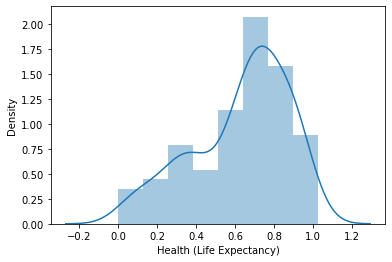

In [24]:
sns.distplot(happiness_continuous['Health (Life Expectancy)'],kde=True)

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

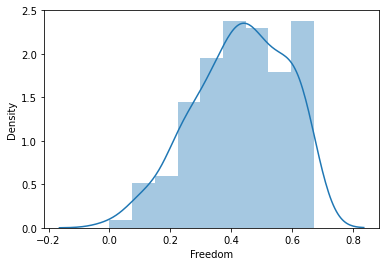

In [25]:
sns.distplot(happiness_continuous['Freedom'],kde=True)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

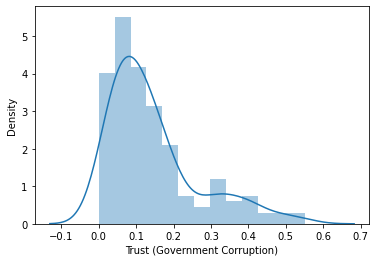

In [26]:
sns.distplot(happiness_continuous['Trust (Government Corruption)'],kde=True)

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

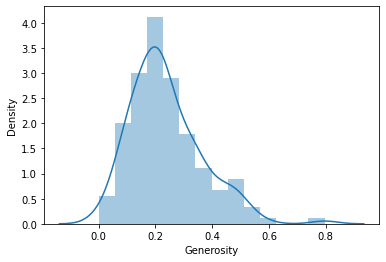

In [27]:
sns.distplot(happiness_continuous['Generosity'],kde=True)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

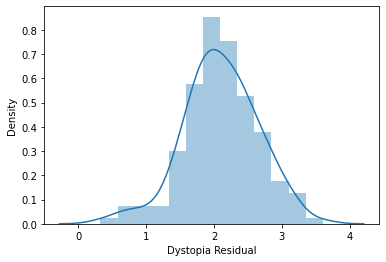

In [28]:
sns.distplot(happiness_continuous['Dystopia Residual'],kde=True)

# Encoding of DataFrame

In [29]:
from sklearn.preprocessing import OrdinalEncoder
Encoder=OrdinalEncoder()

In [30]:
for i in happiness.columns:
    if happiness[i].dtypes=="object":
        happiness[i]=Encoder.fit_transform(happiness[i].values.reshape(-1,1))

In [31]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Describing Dataset

In [32]:
happiness.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

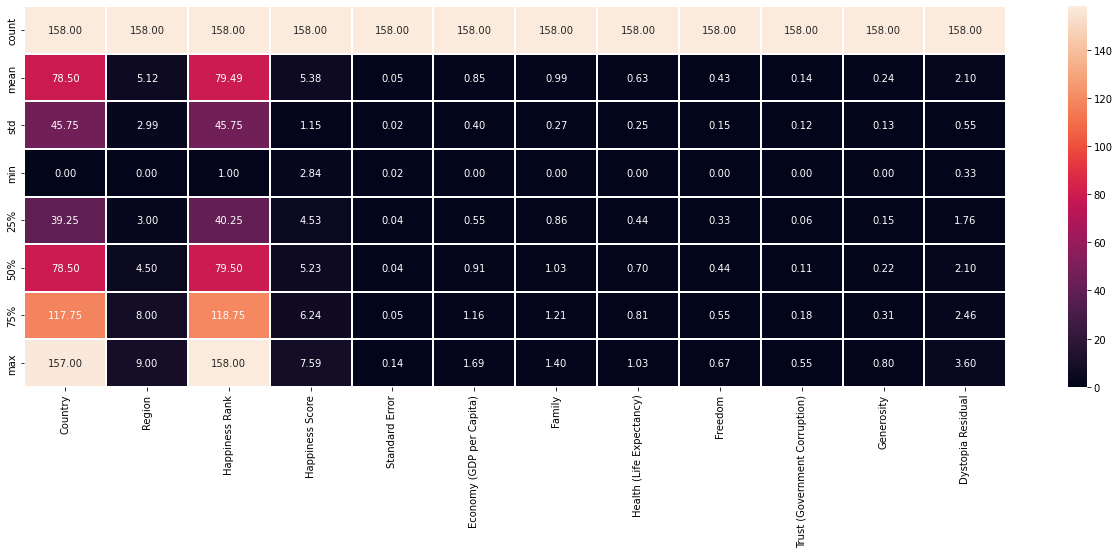

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(happiness.describe(), annot=True, linewidth=0.1, linecolor="white", fmt="0.2f")

# Checking Correlation with Target Variable

In [34]:
happiness.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

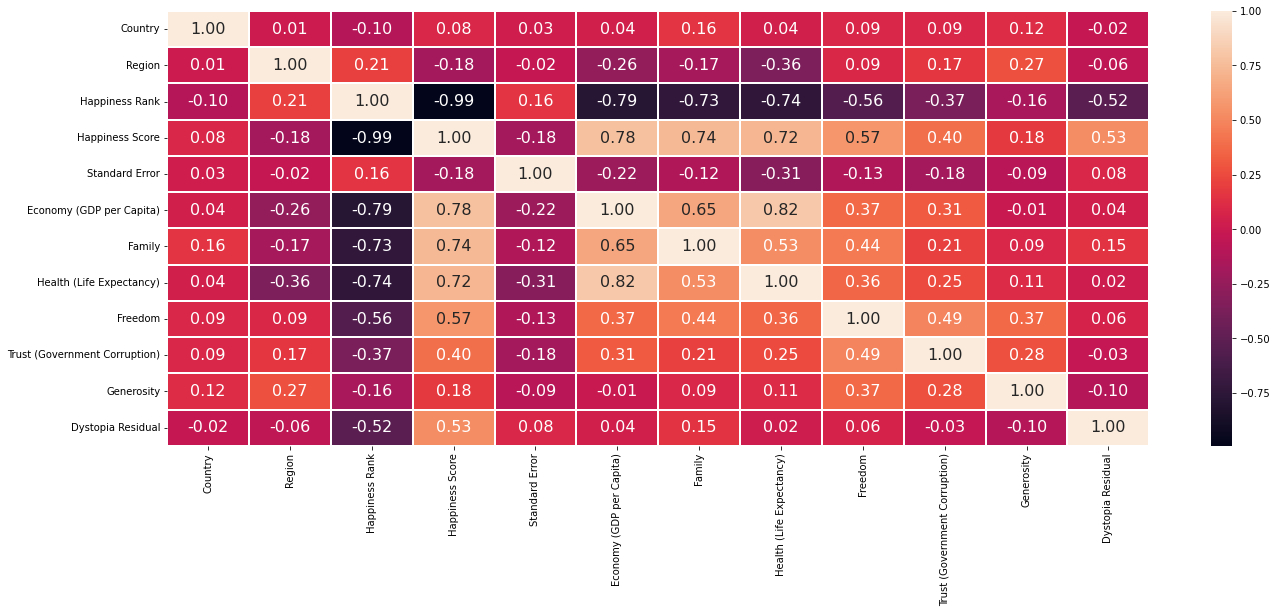

In [35]:
plt.figure(figsize=(22,8))
sns.heatmap(happiness.corr(), annot=True, linewidth=0.1, linecolor="white", fmt="0.2f", annot_kws={"size": 16})

#### Checking positive and Negative column

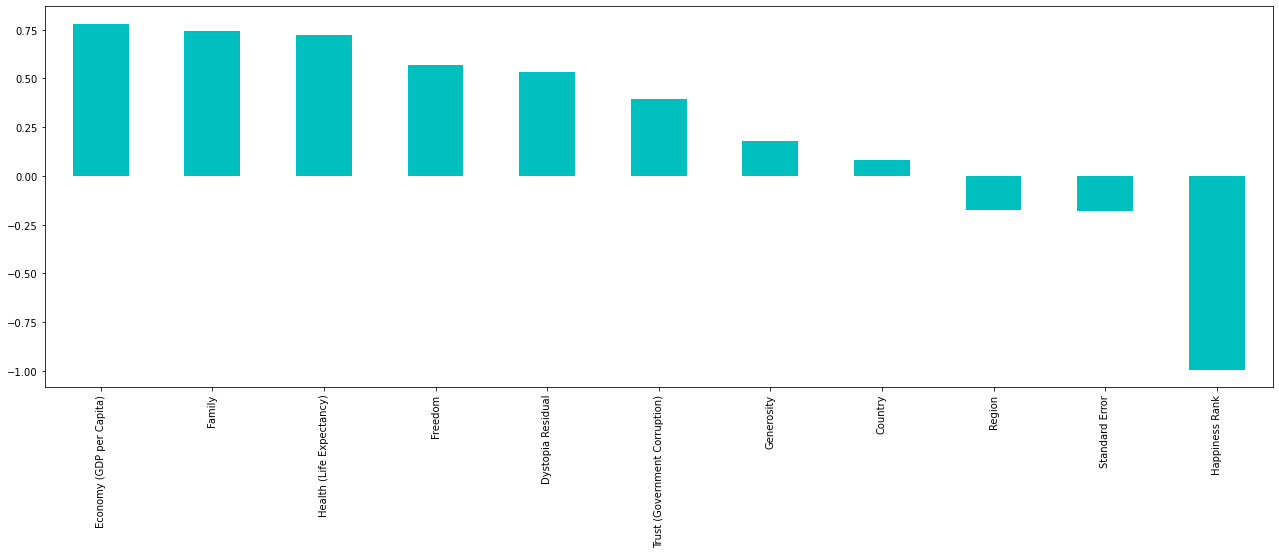

In [36]:
plt.figure(figsize=(22,7))
happiness.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel=('Feature')
plt.ylabel=('column with target names')
plt.title=('correlation')
plt.show()

# Checking Outliers

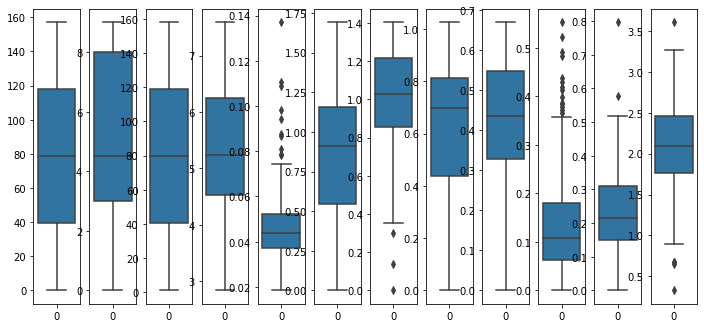

In [37]:
collist=happiness.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=happiness[collist[i]])

# Checking Skewness

In [38]:
happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [39]:
happiness.drop(['Standard Error'],axis=1, inplace=True )

# Removing Multicollinearity

In [40]:
def  cal_vif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

# Outliers removal with Scipy

In [41]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(happiness))
z

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [42]:
happiness.describe()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

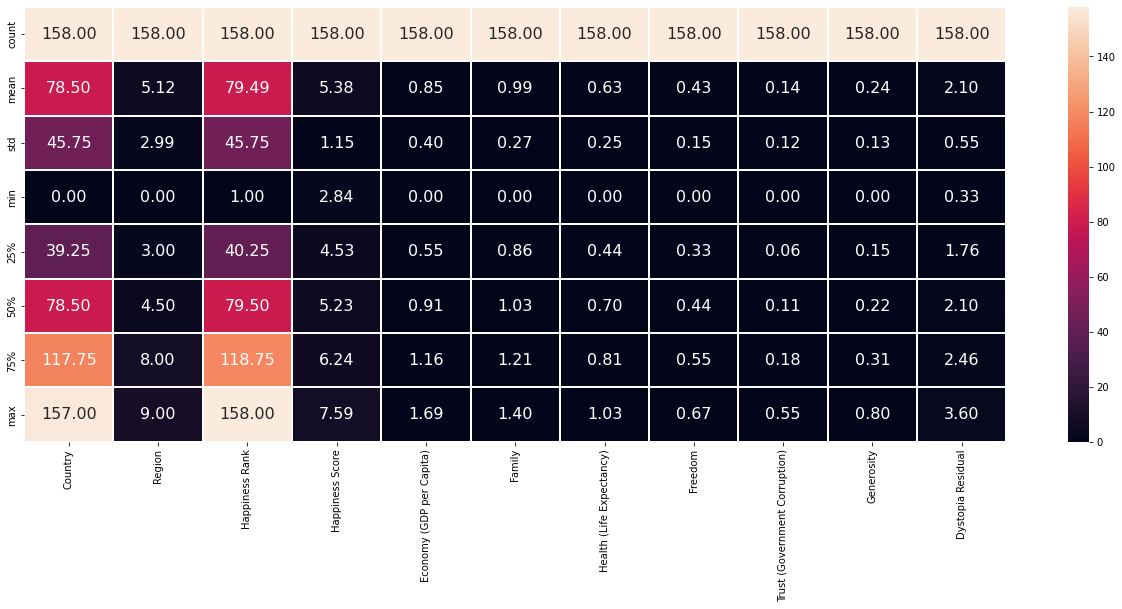

In [43]:
plt.figure(figsize=(22,8))
sns.heatmap(happiness.describe(), annot=True, linewidth=0.1, linecolor="white", fmt="0.2f", annot_kws={"size": 16})

In [44]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  9,  5,  8, 10,  5], dtype=int64))


In [45]:
z

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [46]:
z.iloc[40]

Country                          1.392246
Region                           0.710580
Happiness Rank                   0.843987
Happiness Score                  0.694129
Economy (GDP per Capita)         0.910039
Family                           0.708987
Health (Life Expectancy)         0.062646
Freedom                          0.866924
Trust (Government Corruption)    1.103367
Generosity                       0.642559
Dystopia Residual                0.307801
Name: 40, dtype: float64

In [47]:
happiness_new= happiness[(z<3).all(axis=1)]

In [48]:
print('old_dataframe',happiness.shape)
print('new_dataframe', happiness_new.shape)
print('total_dropped_rows', happiness.shape[0]-happiness_new.shape[0])

old_dataframe (158, 11)
new_dataframe (152, 11)
total_dropped_rows 6


In [49]:
loss_percent=((158-149)/158)*100
loss_percent

5.69620253164557

In [50]:
happiness_new

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151.0,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152.0,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [51]:
x=happiness_new.iloc[:,:-1]

In [52]:
y=happiness_new.iloc[:,-1]

# Removing all skewness

In [53]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.1887051 ,  1.23986819, -2.06118488, ...,  1.76230969,
         1.8220699 ,  0.65595135],
       [-0.31421047,  1.23986819, -2.00536253, ...,  1.44688503,
         0.35523024,  1.57166845],
       [-0.81704158,  1.23986819, -1.95460445, ...,  1.6221701 ,
         1.95457489,  0.97742359],
       ...,
       [-2.10859031,  0.67236186,  1.5407485 , ..., -1.27152318,
        -0.16357633,  1.13659521],
       [-1.51998719,  0.96090613,  1.57594638, ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [-1.26108344,  0.96090613,  1.61101853, ..., -1.85450203,
        -0.11827784, -0.18319784]])

# Scaling using Standard Scaler

In [54]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.1887051 ,  1.23986819, -2.06118488, ...,  1.76230969,
         1.8220699 ,  0.65595135],
       [-0.31421047,  1.23986819, -2.00536253, ...,  1.44688503,
         0.35523024,  1.57166845],
       [-0.81704158,  1.23986819, -1.95460445, ...,  1.6221701 ,
         1.95457489,  0.97742359],
       ...,
       [-2.10859031,  0.67236186,  1.5407485 , ..., -1.27152318,
        -0.16357633,  1.13659521],
       [-1.51998719,  0.96090613,  1.57594638, ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [-1.26108344,  0.96090613,  1.61101853, ..., -1.85450203,
        -0.11827784, -0.18319784]])

# Creating Model for prediction

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

# LinearcRegression Model

In [56]:
lr=LinearRegression()
ms=MinMaxScaler()

# Splitting the Dataframe (Create & Train the Model)

In [57]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('Linear regression model Result are:-' )
    print('At random state' , {i} , ':' , 'the training accuracy is : ',{r2_score(y_train,pred_train)})
    print('At random state' , {i} , ':' , 'the testing accuracy is : ',{r2_score(y_test,pred_test)},'\n')

Linear regression model Result are:-
At random state {0} : the training accuracy is :  {0.977390949662438}
At random state {0} : the testing accuracy is :  {0.9655168097002366} 

Linear regression model Result are:-
At random state {1} : the training accuracy is :  {0.9791713703745404}
At random state {1} : the testing accuracy is :  {0.9569949165273788} 

Linear regression model Result are:-
At random state {2} : the training accuracy is :  {0.9760944604906894}
At random state {2} : the testing accuracy is :  {0.9728825586307266} 

Linear regression model Result are:-
At random state {3} : the training accuracy is :  {0.9788754673157815}
At random state {3} : the testing accuracy is :  {0.9651776025405153} 

Linear regression model Result are:-
At random state {4} : the training accuracy is :  {0.9794227015724756}
At random state {4} : the testing accuracy is :  {0.9468718394022599} 

Linear regression model Result are:-
At random state {5} : the training accuracy is :  {0.97559916623

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=5, test_size=0.20)

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
pred_test=lr.predict(x_test)

In [61]:
print({r2_score(y_test,pred_test)})

{0.9732033993432745}


In [62]:
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred_test,y_test))
print('mean_squared_error', mean_squared_error(pred_test,y_test))

Result  from Linear regression model
R2 score is  0.973069763399842
mean_squared_error 0.00606573609805912


In [63]:
x.shape

(152, 10)

In [64]:
y.shape

(152,)

# Cross Validation score for Linear Regression

In [65]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",{j},"the cv score is ", {cv_mean}, "\n and accuracy score for training is ",{train_accuracy},"\n and accuracy score for testing is",{test_accuracy}, "\n" )

At cross fold  {2} the cv score is  {0.46699530517251886} 
 and accuracy score for training is  {-1.0184954365968006} 
 and accuracy score for testing is {0.9732033993432745} 

At cross fold  {3} the cv score is  {0.8262916914498443} 
 and accuracy score for training is  {-1.0184954365968006} 
 and accuracy score for testing is {0.9732033993432745} 

At cross fold  {4} the cv score is  {0.8728421920737383} 
 and accuracy score for training is  {-1.0184954365968006} 
 and accuracy score for testing is {0.9732033993432745} 

At cross fold  {5} the cv score is  {0.8717952164507704} 
 and accuracy score for training is  {-1.0184954365968006} 
 and accuracy score for testing is {0.9732033993432745} 

At cross fold  {6} the cv score is  {0.9025494915965756} 
 and accuracy score for training is  {-1.0184954365968006} 
 and accuracy score for testing is {0.9732033993432745} 

At cross fold  {7} the cv score is  {0.9064395660637109} 
 and accuracy score for training is  {-1.0184954365968006} 
 

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [69]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

ls_score=r2_score(y_test,pred_ls)
ls_score

-0.18051337063163686

In [70]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.7639002354652299

# Ensemble Technique

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Random Forest Regressor Model

In [73]:
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=2000)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Random_forestregressor result :-')
print('R2 score is :',r2_score(pred,y_test))
print('mean_squared_error :', mean_squared_error(pred,y_test))

Random_forestregressor result :-
R2 score is : -0.3408172768051312
mean_squared_error : 0.1124750464689355


# AdaBoost Regressor Model

In [74]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print('AdaBoostregressor Result')
print('R2 score is ',r2_score(pred_test,y_test))
print('mean_squared_error', mean_squared_error(pred_test,y_test))

AdaBoostregressor Result
R2 score is  0.973069763399842
mean_squared_error 0.00606573609805912


# Scores of All Models

In [75]:
linear=lr.score(x_train, y_train)
Random=rf.score(x_train,y_train)
Ada=ab.score(x_train,y_train)
print(linear,'\n')
print(Random,'\n')
print(Ada)

0.9755991662377427 

0.9340641009828605 

0.8533408302618444


# Using the simple- tuning techniques

using of K-Fold cross-validation technique

In [76]:
pred_rf= rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lrf= r2_score(y_test,pred_rf)
for j in range(2,10):
    lrfscore=cross_val_score(rf,x,y,cv=j)
    lrfs= lrfscore.mean()
    print('At cv:',j)
    print('cross_validation_score is:',lrfs*100)
    print('R2_score is :',lrf*100)
    print("\n")

At cv: 2
cross_validation_score is: -144.42861884575063
R2_score is : 50.31190188048092


At cv: 3
cross_validation_score is: -85.5425814125766
R2_score is : 50.31190188048092


At cv: 4
cross_validation_score is: -44.360459727496796
R2_score is : 50.31190188048092


At cv: 5
cross_validation_score is: -76.40410817880348
R2_score is : 50.31190188048092


At cv: 6
cross_validation_score is: -22.82772577472144
R2_score is : 50.31190188048092


At cv: 7
cross_validation_score is: -33.58422619279294
R2_score is : 50.31190188048092


At cv: 8
cross_validation_score is: -47.639176988764085
R2_score is : 50.31190188048092


At cv: 9
cross_validation_score is: -10.436607037008233
R2_score is : 50.31190188048092




In [77]:
lrfscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("cv score  is:",lrfscore_selected,"\n accuracy_score is:",lrfs)

cv score  is: -0.7640410817880349 
 accuracy_score is: -0.10436607037008233


In [78]:
import pickle
filename='world_happiness'
pickle.dump(rf,open(filename,'wb'))

In [79]:
import numpy as np
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_com

,Orginal,Predicted
0,1.86040,1.743689
1,2.11773,2.318968
2,2.27513,2.213304
3,2.23741,2.280804
4,1.68135,1.704417
5,2.13090,2.287604
6,2.70201,2.276765
7,0.65429,1.807306
8,2.11569,2.181591
9,1.93129,1.888878
